In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data=pd.read_csv("/content/drive/MyDrive/loan_approval_dataset.csv")
pd.set_option('display.max_columns',None)

In [3]:
data.head(4)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected


In [4]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# **Data cleaning**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
data.shape

(4269, 13)

In [7]:
data.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [8]:
data.duplicated().sum()

0

# **Statistical analysis**

In [9]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# **Label Encoding **

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [12]:
encoder = LabelEncoder()


data[' education'] = encoder.fit_transform(data[' education'])
data[' self_employed']= encoder.fit_transform(data[' self_employed'])
data[' loan_status']= encoder.fit_transform(data[' loan_status'])

# Show the dataset with the encoded column
print(data)

      loan_id   no_of_dependents   education   self_employed   income_annum  \
0           1                  2           0               0        9600000   
1           2                  0           1               1        4100000   
2           3                  3           0               0        9100000   
3           4                  3           0               0        8200000   
4           5                  5           1               1        9800000   
...       ...                ...         ...             ...            ...   
4264     4265                  5           0               1        1000000   
4265     4266                  0           1               1        3300000   
4266     4267                  2           1               0        6500000   
4267     4268                  1           1               0        4100000   
4268     4269                  1           0               0        9200000   

       loan_amount   loan_term   cibil_score   resi

# **Histogram for checking skweness**

array([[<Axes: title={'center': 'loan_id'}>,
        <Axes: title={'center': ' no_of_dependents'}>,
        <Axes: title={'center': ' education'}>,
        <Axes: title={'center': ' self_employed'}>],
       [<Axes: title={'center': ' income_annum'}>,
        <Axes: title={'center': ' loan_amount'}>,
        <Axes: title={'center': ' loan_term'}>,
        <Axes: title={'center': ' cibil_score'}>],
       [<Axes: title={'center': ' residential_assets_value'}>,
        <Axes: title={'center': ' commercial_assets_value'}>,
        <Axes: title={'center': ' luxury_assets_value'}>,
        <Axes: title={'center': ' bank_asset_value'}>],
       [<Axes: title={'center': ' loan_status'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

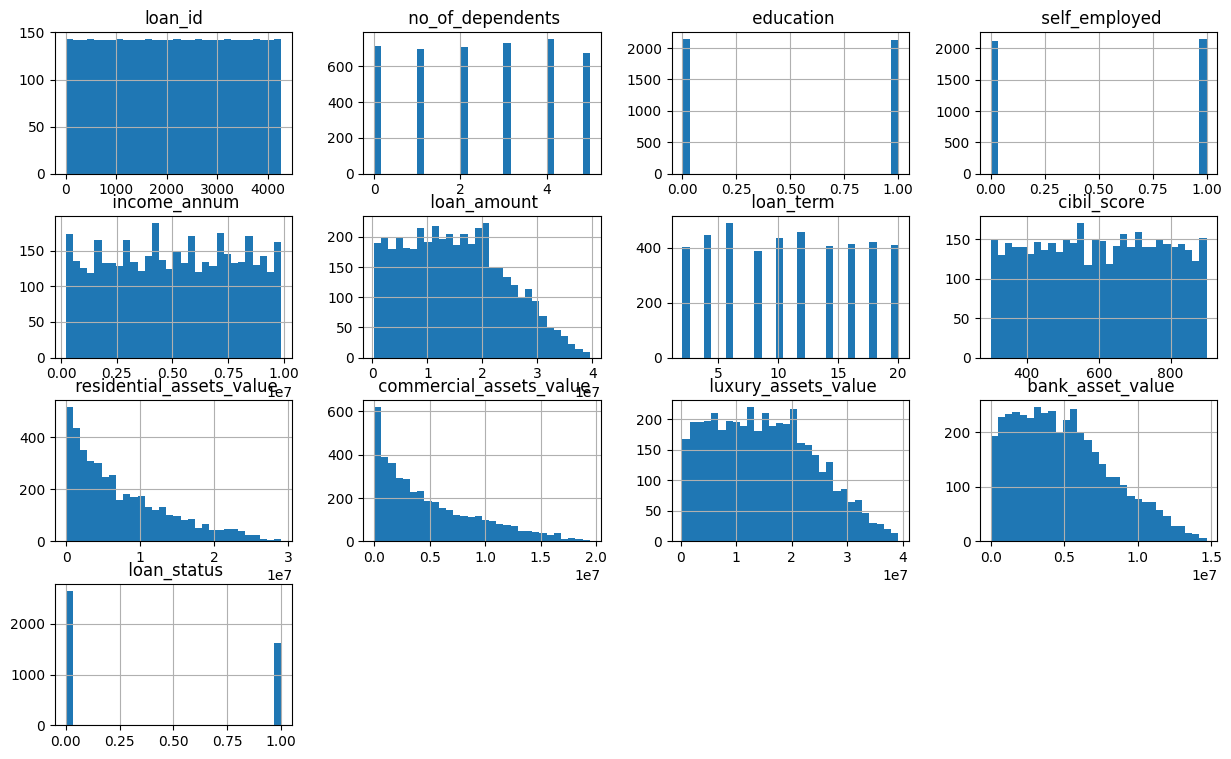

In [13]:
data.hist(bins=30,figsize=(15, 9)) # checking for skweness

In [14]:
Sk=data.skew() # checking skew of whole dataset
print(Sk)

loan_id                      0.000000
 no_of_dependents           -0.017971
 education                   0.008905
 self_employed              -0.014529
 income_annum               -0.012814
 loan_amount                 0.308724
 loan_term                   0.036359
 cibil_score                -0.009039
 residential_assets_value    0.978451
 commercial_assets_value     0.957791
 luxury_assets_value         0.322208
 bank_asset_value            0.560725
 loan_status                 0.504087
dtype: float64


<Axes: >

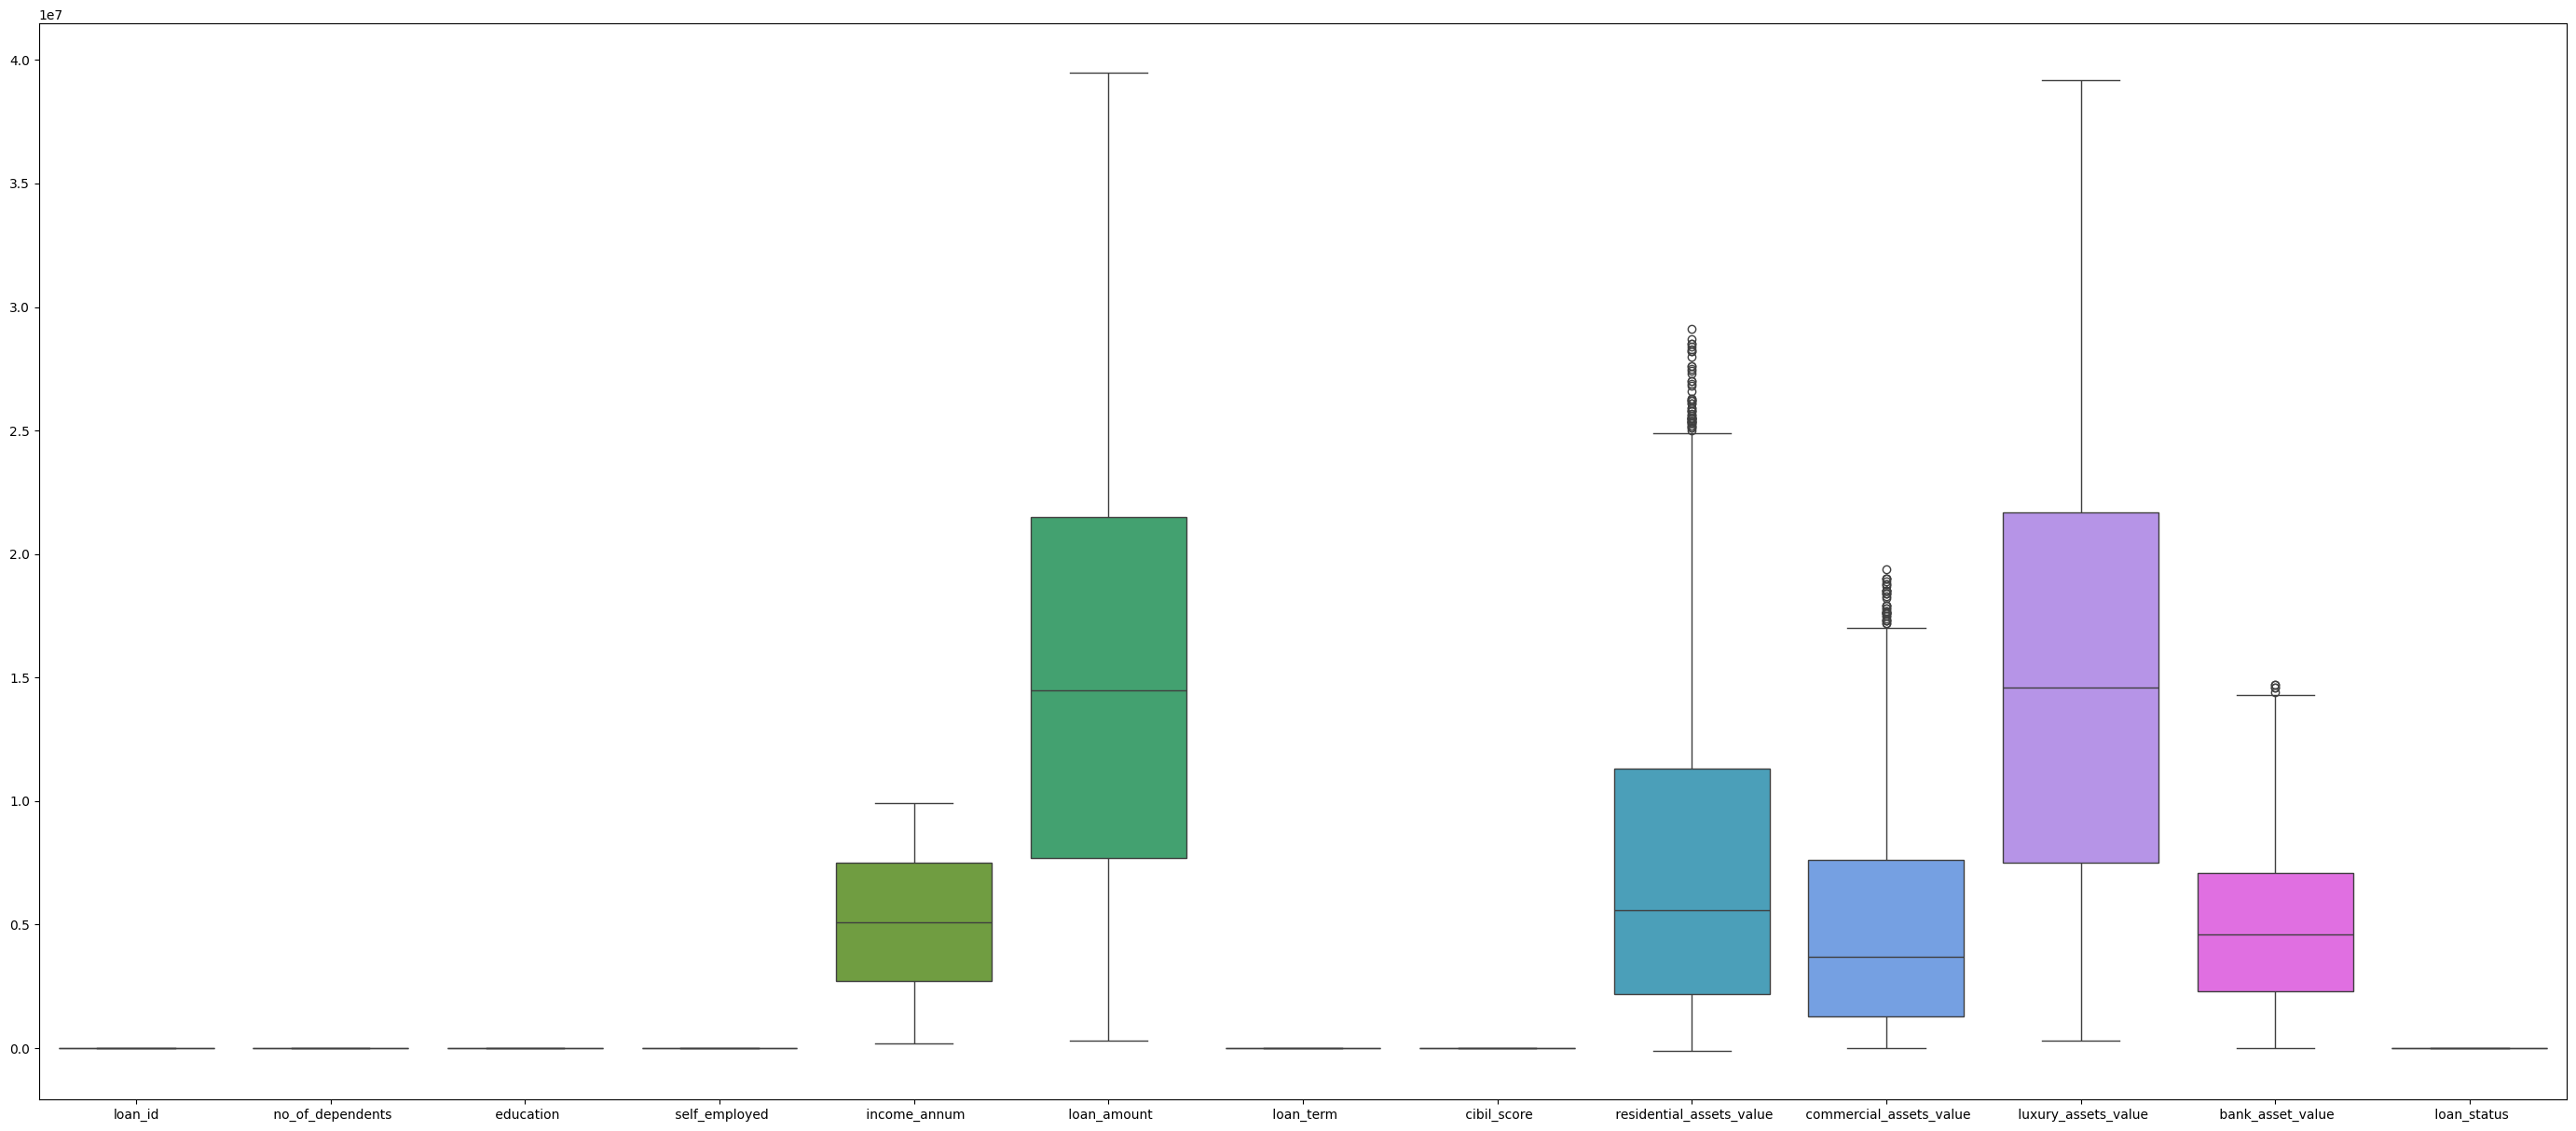

In [15]:
plt.figure(figsize=(35, 15))
sn.boxplot(data)

# **Removing outliers**

<Axes: ylabel=' residential_assets_value'>

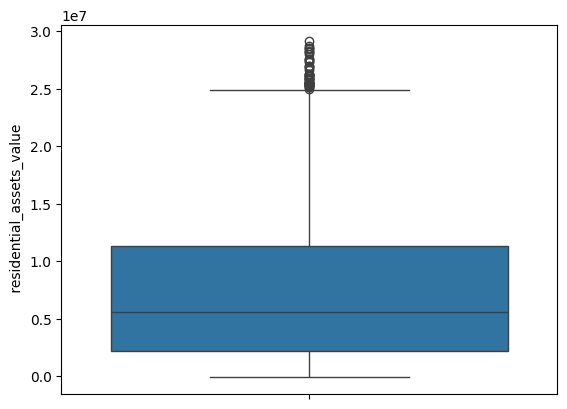

In [16]:
# detecting outliers using box plot
# since proce is th target variable we will be using that variable as a main variable for the detection
sn.boxplot(data[' residential_assets_value'])

<Axes: ylabel=' commercial_assets_value'>

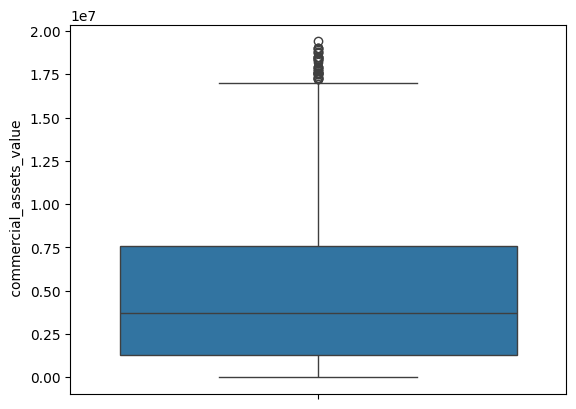

In [17]:
sn.boxplot(data[' commercial_assets_value'])

In [18]:
q1=data[' residential_assets_value'].quantile(0.25)
q3=data[' residential_assets_value'].quantile(0.75)
iqr=q3-q1
max_r=q3+1.5*iqr
min_r=q3-1.5*iqr
print(max_r)
print(min_r)

24950000.0
-2350000.0


In [19]:
data[' residential_assets_value'] = np.where(data[' residential_assets_value'] >= max_r, data[' residential_assets_value'].median(), data[' residential_assets_value'])
data[' residential_assets_value'] = np.where(data[' residential_assets_value'] <= min_r, data[' residential_assets_value'].median(), data[' residential_assets_value'])

<Axes: ylabel=' residential_assets_value'>

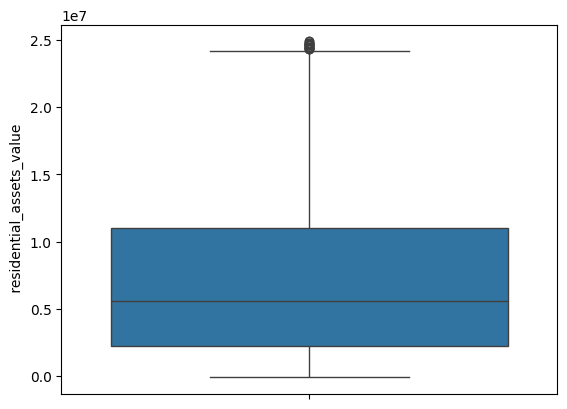

In [20]:
sn.boxplot(data[' residential_assets_value'])

In [21]:
q11=data[' commercial_assets_value'].quantile(0.25)
q33=data[' commercial_assets_value'].quantile(0.75)
iqk=q33-q11
max_c=q33+1.5*iqk
min_c=q33-1.5*iqk
print(max_c)
print(min_c)

17050000.0
-1850000.0


In [22]:
data[' commercial_assets_value'] = np.where(data[' commercial_assets_value'] >= max_c, data[' commercial_assets_value'].median(), data[' commercial_assets_value'])
data[' commercial_assets_value'] = np.where(data[' commercial_assets_value'] <= min_c, data[' commercial_assets_value'].median(), data[' commercial_assets_value'])

<Axes: ylabel=' commercial_assets_value'>

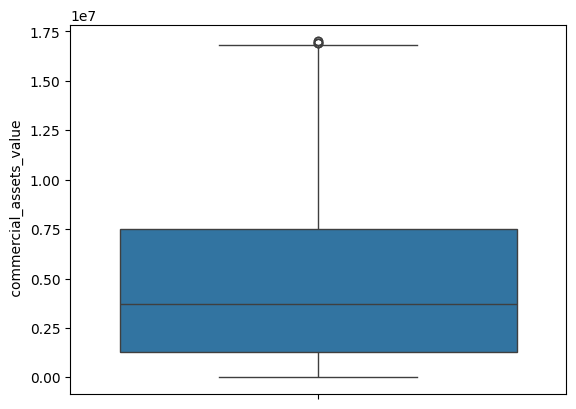

In [61]:
sn.boxplot(data[' commercial_assets_value'])

# Box plot after removing outliers from commercial and residential value asset

<Axes: >

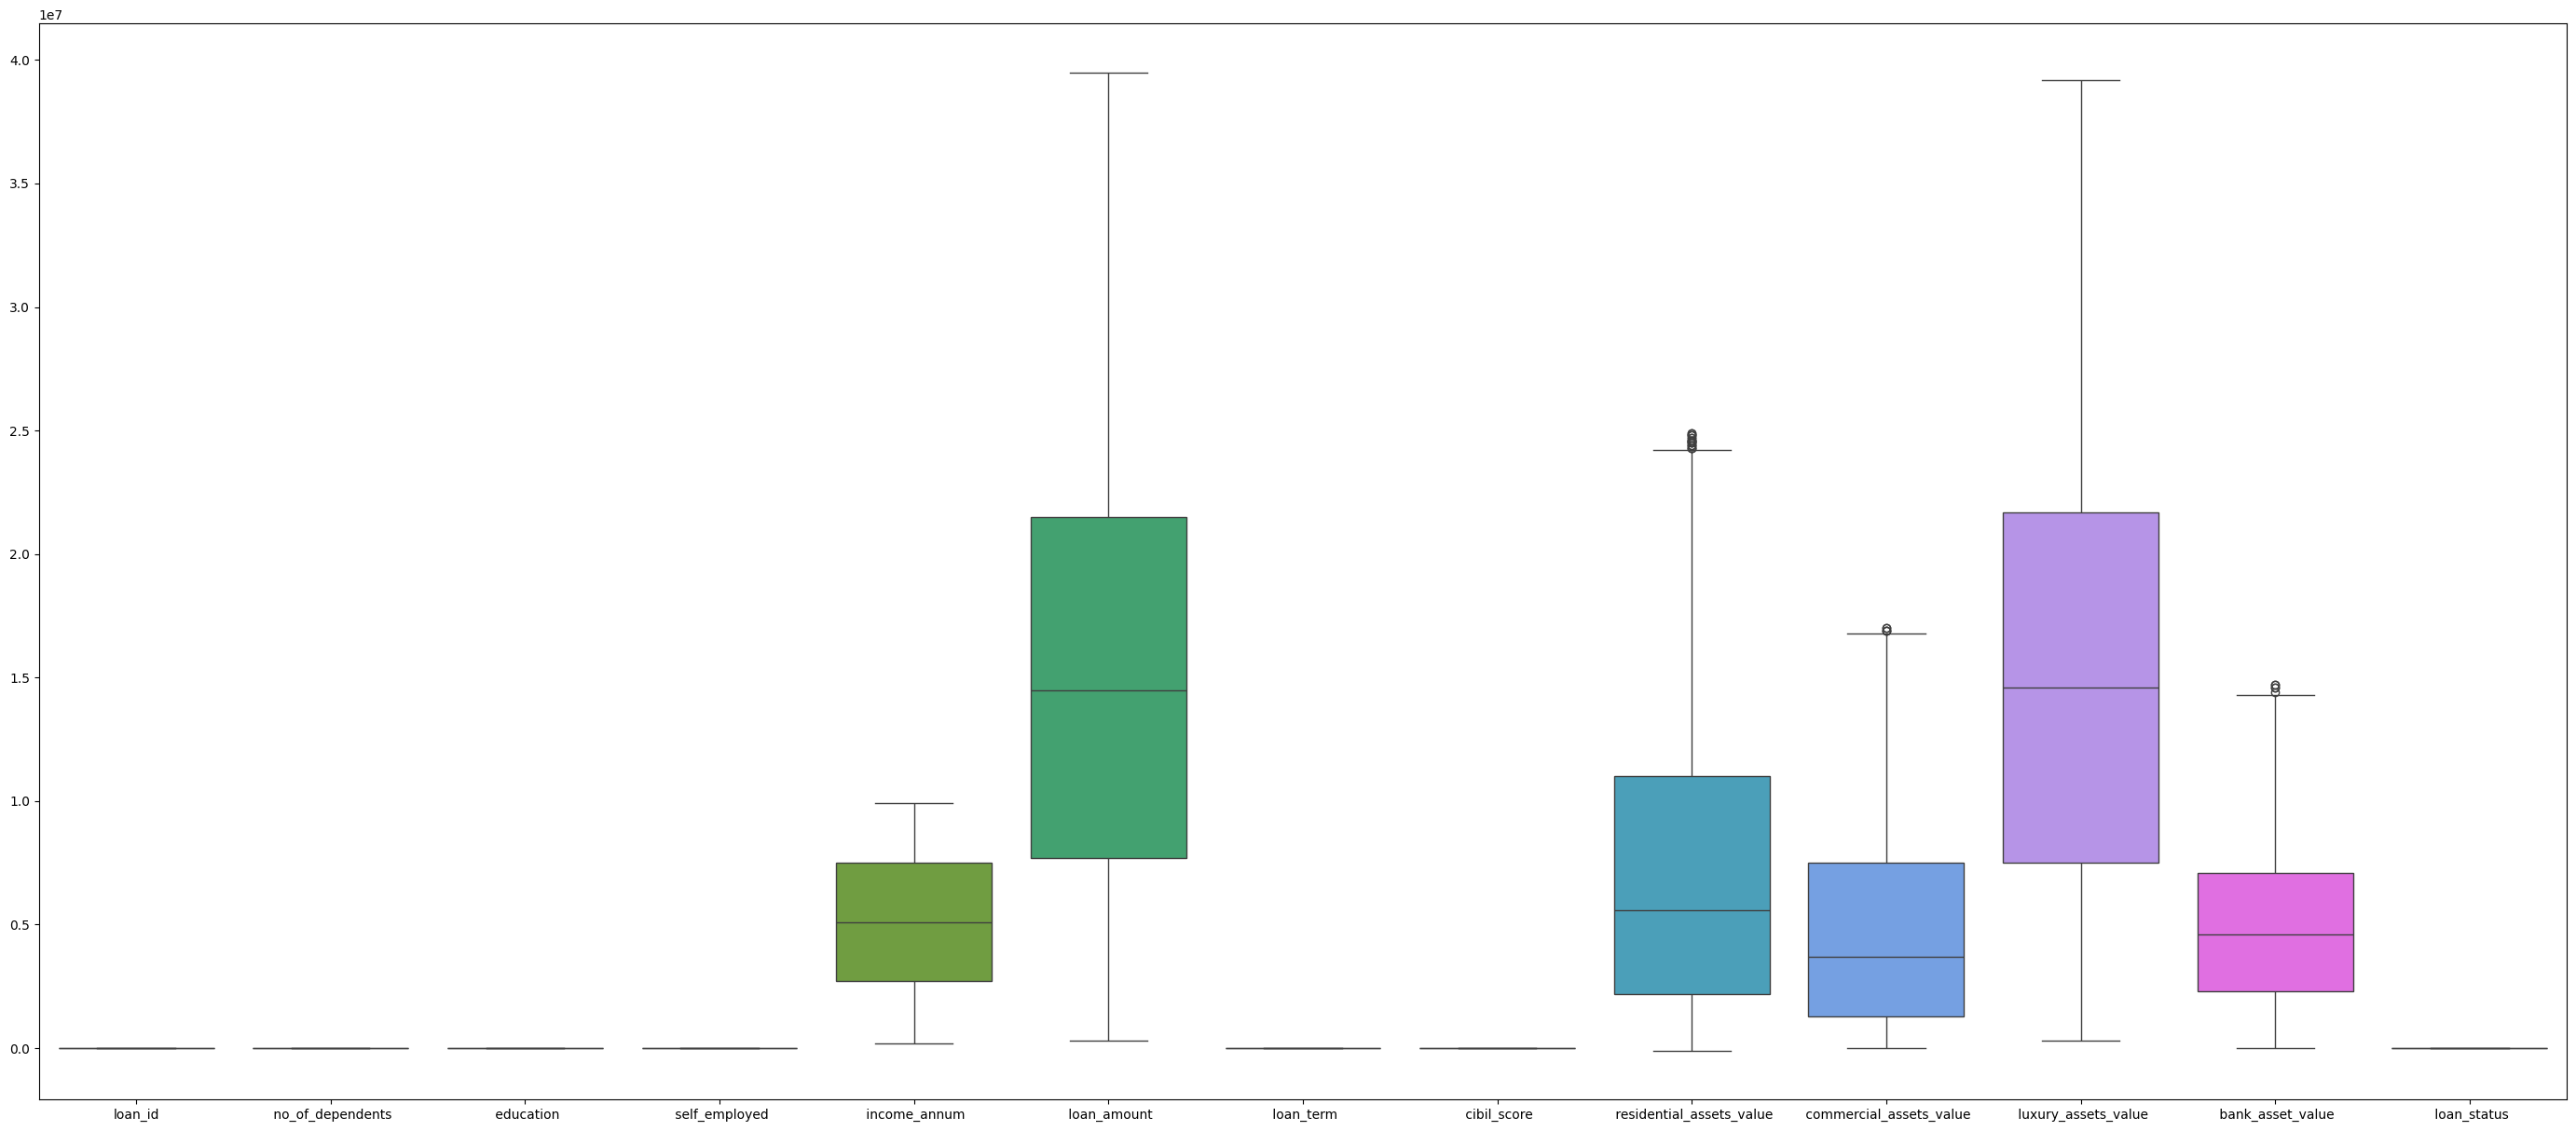

In [23]:
plt.figure(figsize=(35, 15))
sn.boxplot(data)

Exploratory data analysis

In [24]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

<ipython-input-26-7c46453146e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=' no_of_dependents', y=' loan_amount', data=data, palette='coolwarm')


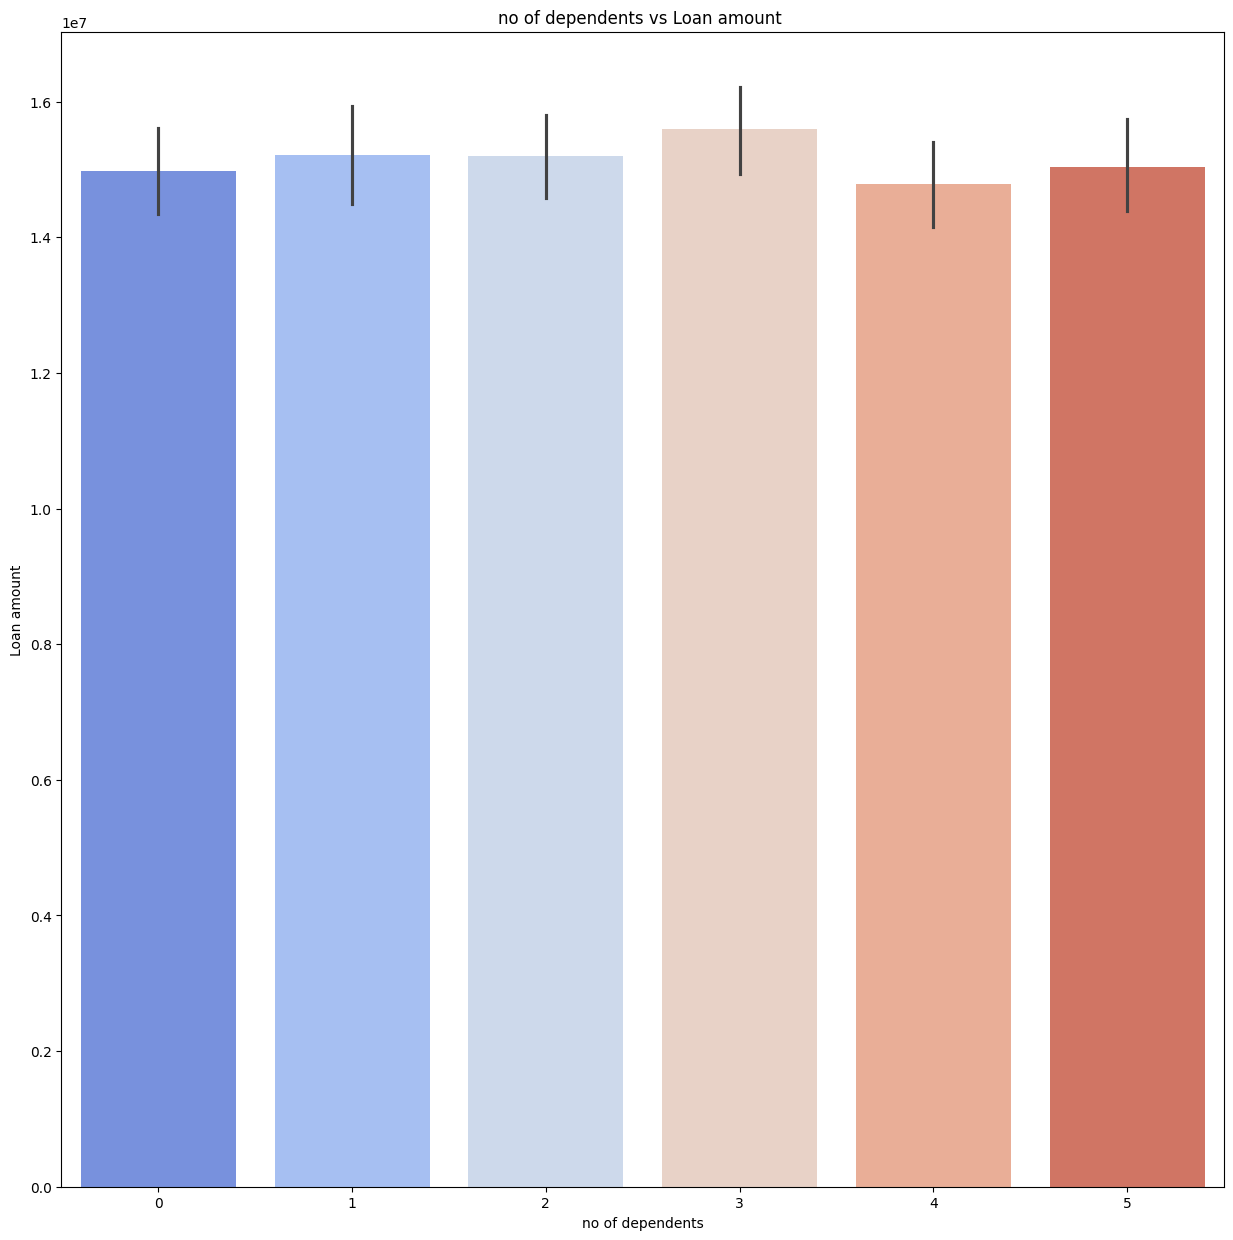

In [26]:
plt.figure(figsize=(15, 15))
sn.barplot(x=' no_of_dependents', y=' loan_amount', data=data, palette='coolwarm')
plt.title('no of dependents vs Loan amount ')
plt.xlabel('no of dependents')
plt.ylabel('Loan amount')
plt.show()

<ipython-input-28-ec00d649a663>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=' no_of_dependents', y=' loan_term', data=data, palette='coolwarm')


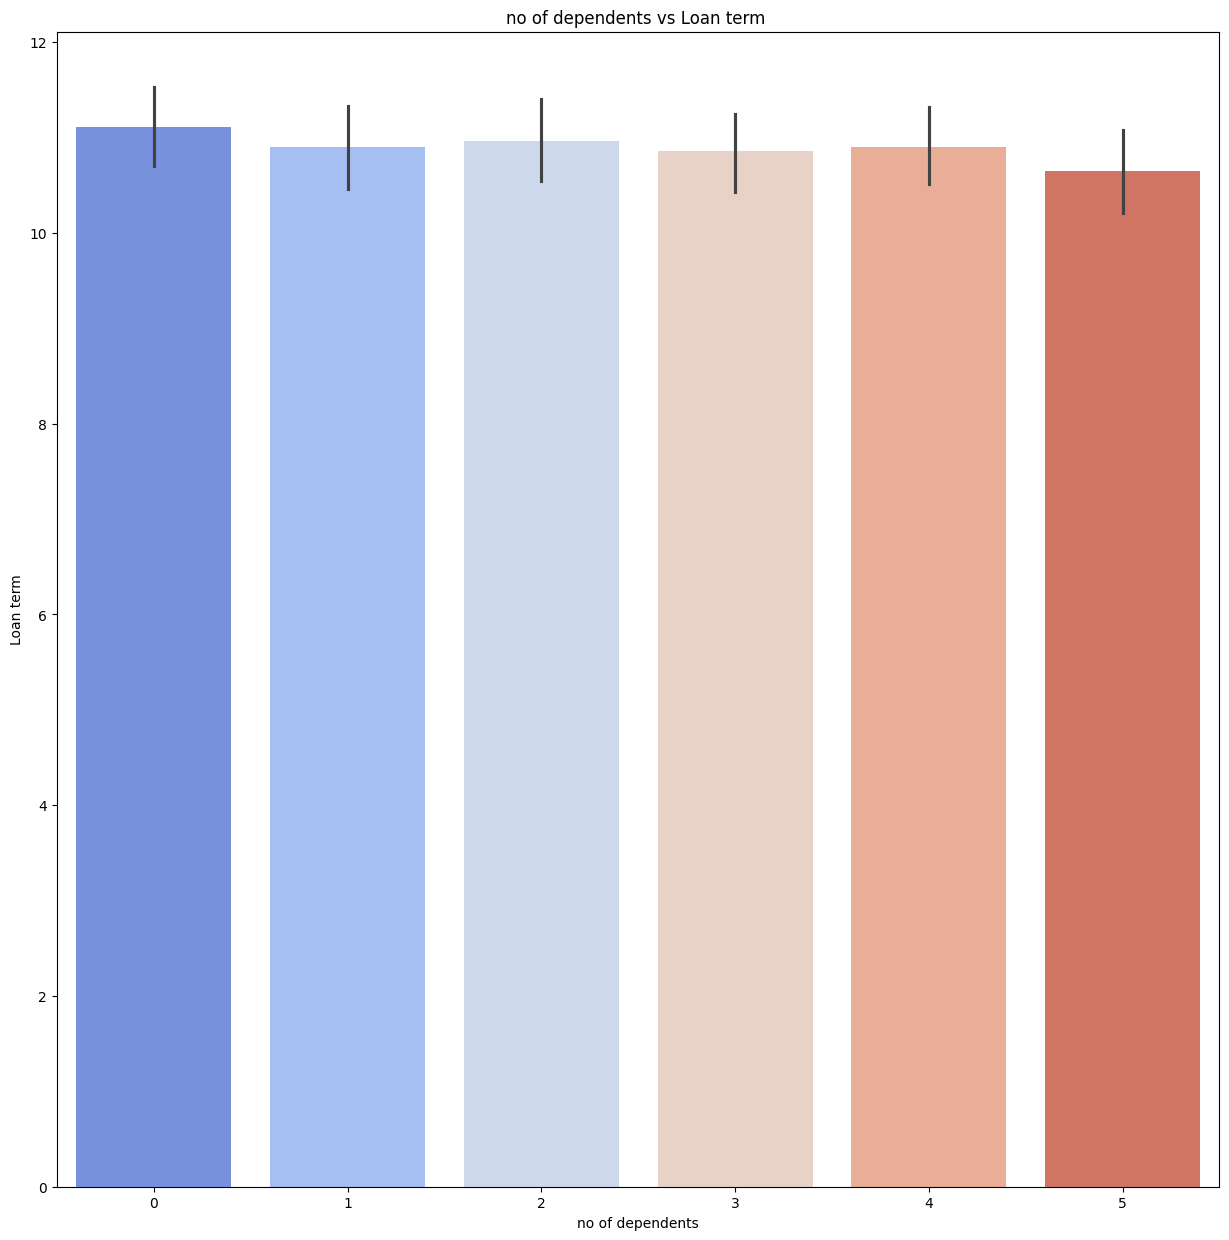

In [28]:
plt.figure(figsize=(15, 15))
sn.barplot(x=' no_of_dependents', y=' loan_term', data=data, palette='coolwarm')
plt.title('no of dependents vs Loan term ')
plt.xlabel('no of dependents')
plt.ylabel('Loan term')
plt.show()

<ipython-input-32-3b2ec5cc2a89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=' education', y=' loan_amount', data=data, palette='coolwarm')


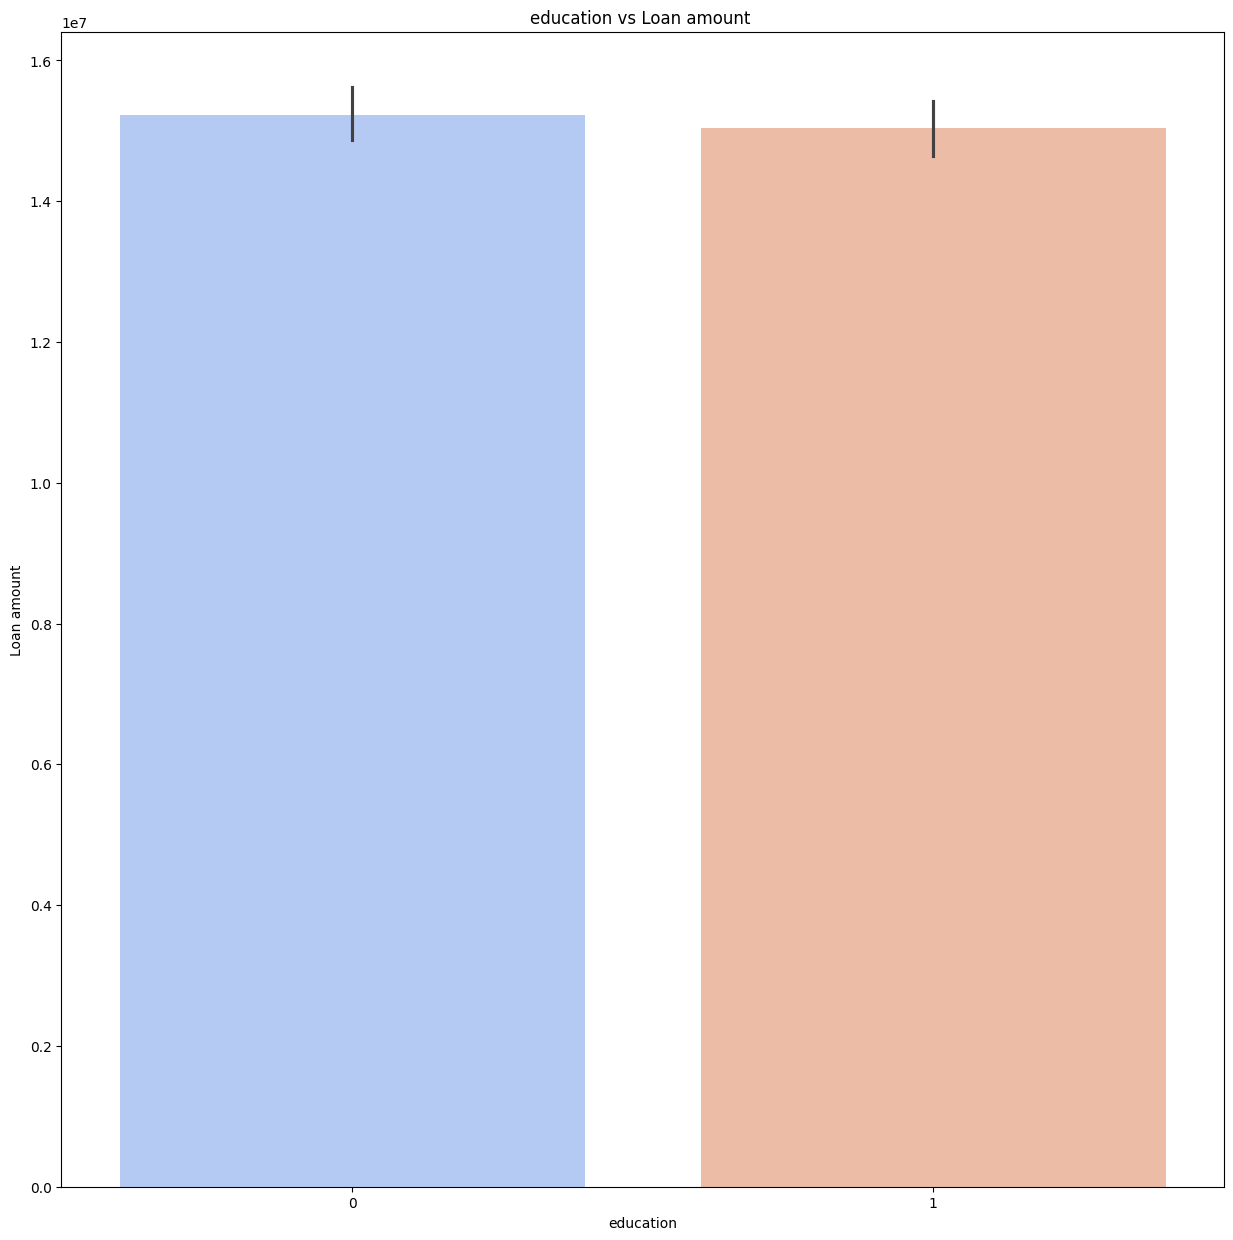

In [32]:
plt.figure(figsize=(15, 15))
sn.barplot(x=' education', y=' loan_amount', data=data, palette='coolwarm')
plt.title('education vs Loan amount ')
plt.xlabel('education')
plt.ylabel('Loan amount')
plt.show()

<ipython-input-31-ea8cd8167266>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=' self_employed', y=' loan_amount', data=data, palette='coolwarm')


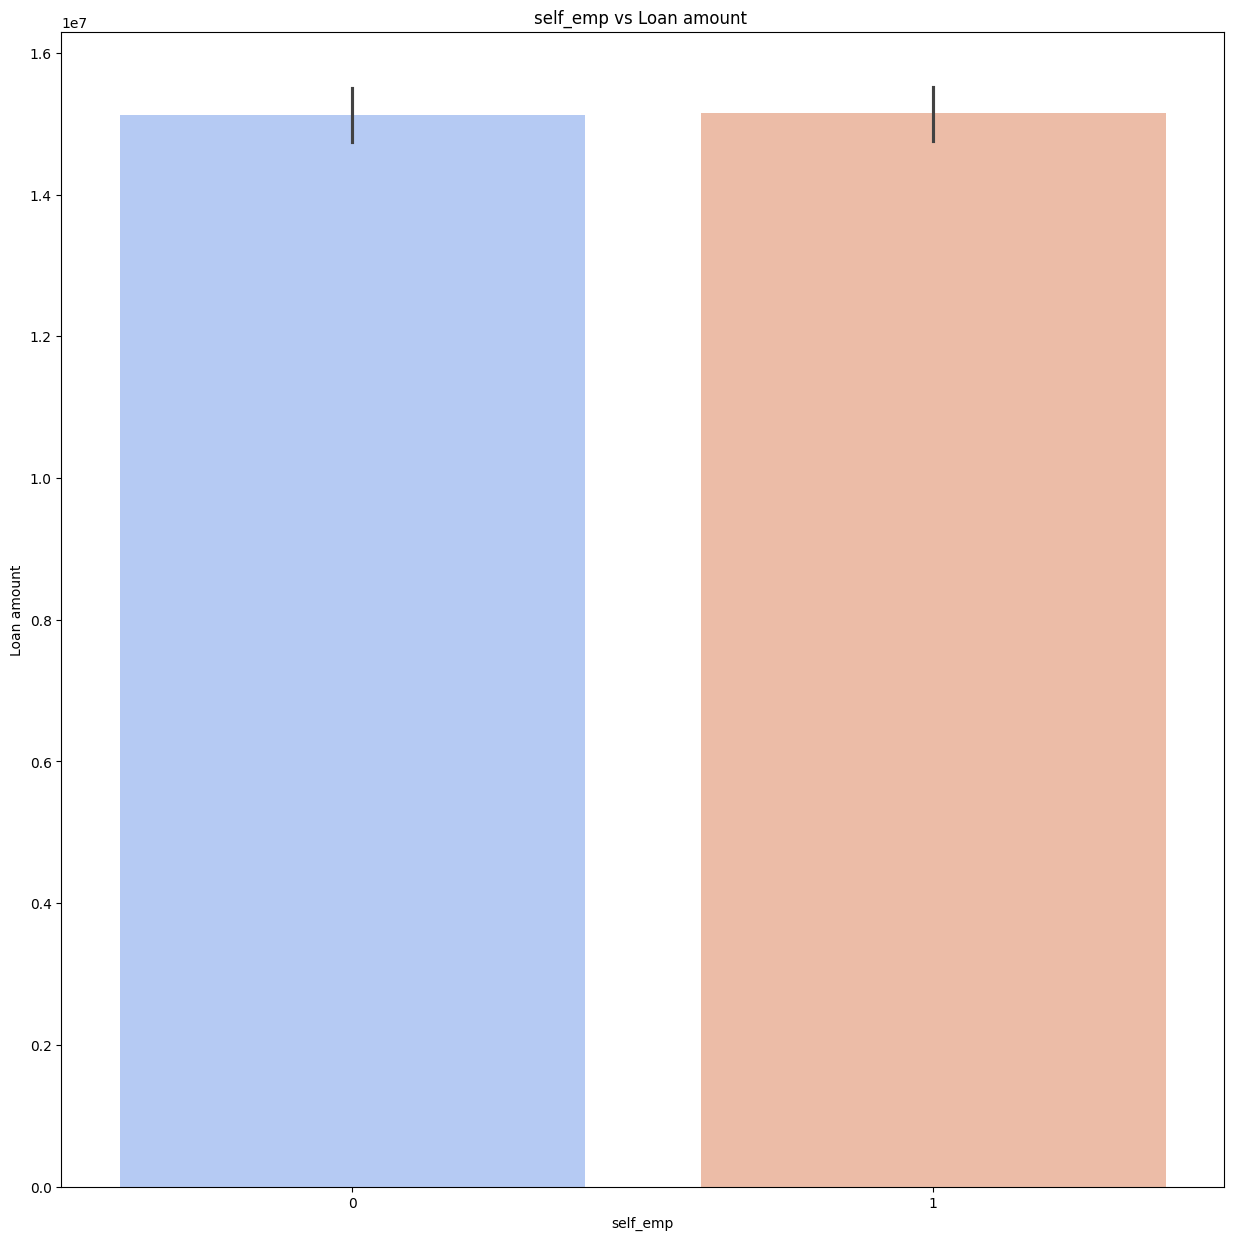

In [31]:
plt.figure(figsize=(15, 15))
sn.barplot(x=' self_employed', y=' loan_amount', data=data, palette='coolwarm')
plt.title('self_emp vs Loan amount ')
plt.xlabel('self_emp')
plt.ylabel('Loan amount')
plt.show()

<ipython-input-34-f9fd741634d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=' education', y=' cibil_score', data=data, palette='inferno')


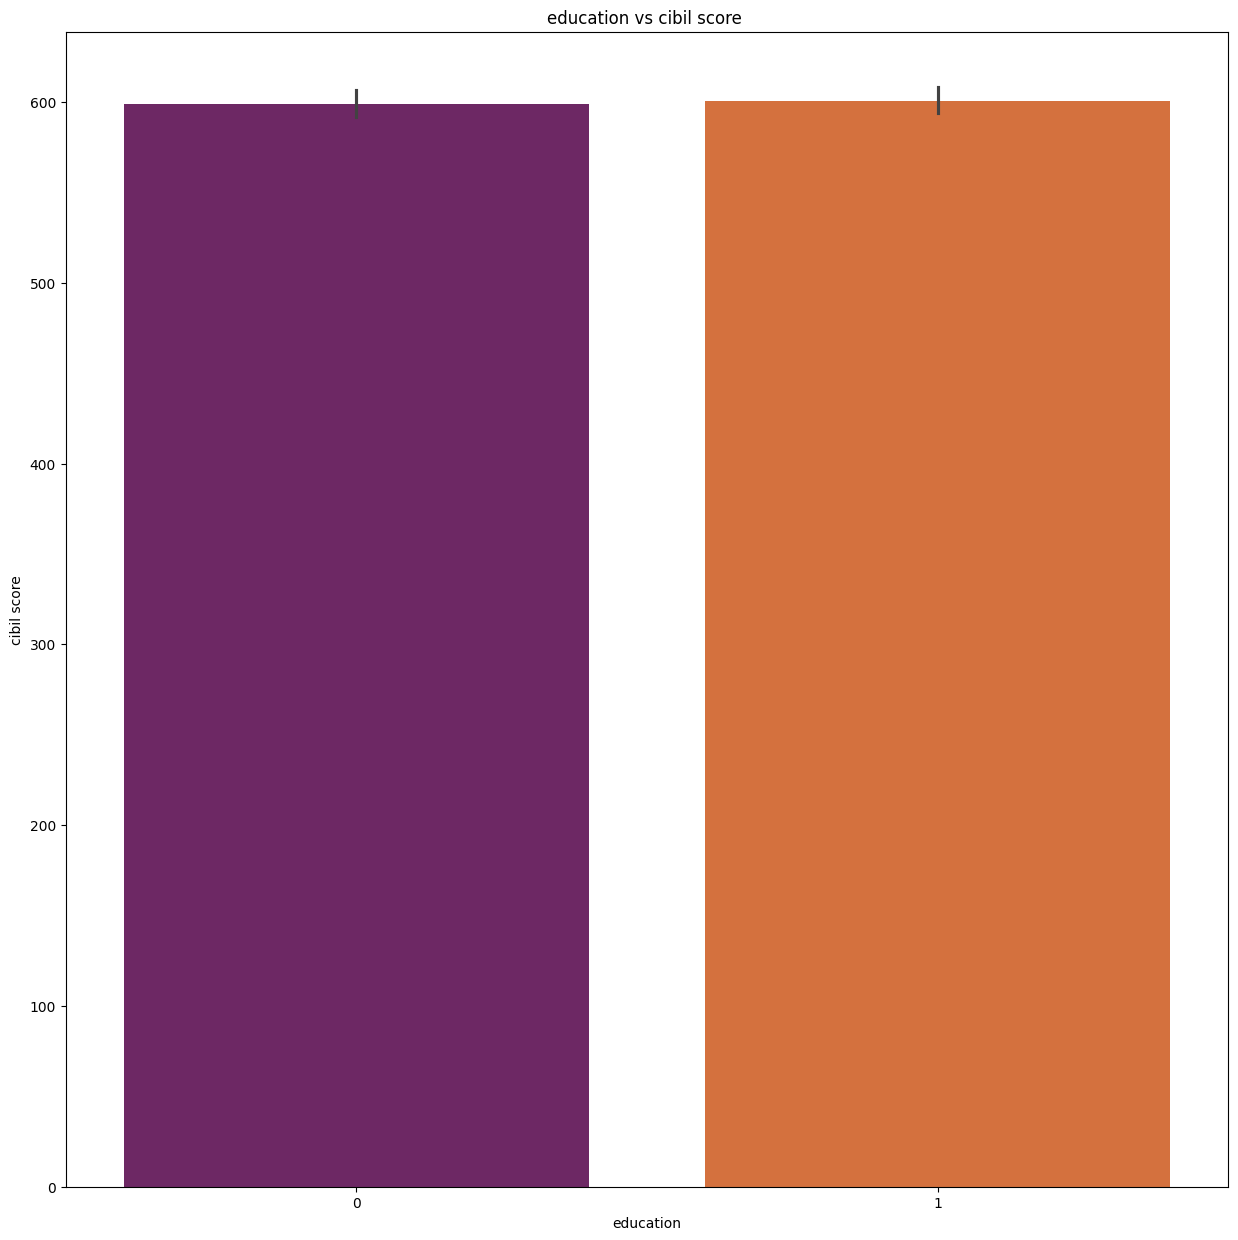

In [34]:
plt.figure(figsize=(15, 15))
sn.barplot(x=' education', y=' cibil_score', data=data, palette='inferno')
plt.title('education vs cibil score ')
plt.xlabel('education')
plt.ylabel('cibil score')
plt.show()

In [50]:
g=data[' cibil_score'].groupby(data[' education']).mean()
g

,cibil_score
education,
0,599.138060
1,600.741176


In [51]:
data[' cibil_score'].groupby(data[' self_employed']).mean()

,cibil_score
self_employed,
0,600.781029
1,599.103256


In [52]:
L=data[' loan_amount'].groupby(data[' education']).mean()
L

,loan_amount
education,
0,1.522915e+07
1,1.503689e+07


In [53]:
data[' loan_amount'].groupby(data[' self_employed']).mean()

,loan_amount
self_employed,
0,1.512025e+07
1,1.514647e+07


In [54]:
data[' commercial_assets_value'].groupby(data[' education']).mean()

,commercial_assets_value
education,
0,4.850140e+06
1,4.847012e+06


In [55]:
data[' residential_assets_value'].groupby(data[' education']).mean()

,residential_assets_value
education,
0,7.330084e+06
1,7.107247e+06


In [56]:
data[' commercial_assets_value'].groupby(data[' self_employed']).mean()

,commercial_assets_value
self_employed,
0,4.945210e+06
1,4.753349e+06


In [57]:
data[' residential_assets_value'].groupby(data[' self_employed']).mean()

,residential_assets_value
self_employed,
0,7.164559e+06
1,7.272977e+06


In [64]:
data[' loan_status'].groupby(data[' self_employed']).value_counts()

self_employed   loan_status
0               0               1318
                1                801
1               0               1338
                1                812
Name: count, dtype: int64

In [63]:
data[' loan_status'].groupby(data[' education']).value_counts()

education   loan_status
0           0               1339
            1                805
1           0               1317
            1                808
Name: count, dtype: int64

# **Applying Model**

In [72]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [73]:
X=data[['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value']]

In [74]:
Y=data[' loan_status']

# **Feature importance or correlation**

In [76]:
correlation = data.corr()
# Show correlation of features with the target
print(correlation[' loan_status'].sort_values(ascending=False))

 loan_status                 1.000000
 loan_term                   0.113036
 residential_assets_value    0.018211
 no_of_dependents            0.018114
 luxury_assets_value         0.015465
 income_annum                0.015189
 bank_asset_value            0.006778
 education                   0.004918
 self_employed              -0.000345
 loan_amount                -0.016150
 commercial_assets_value    -0.016788
loan_id                     -0.017685
 cibil_score                -0.770518
Name:  loan_status, dtype: float64


<Axes: >

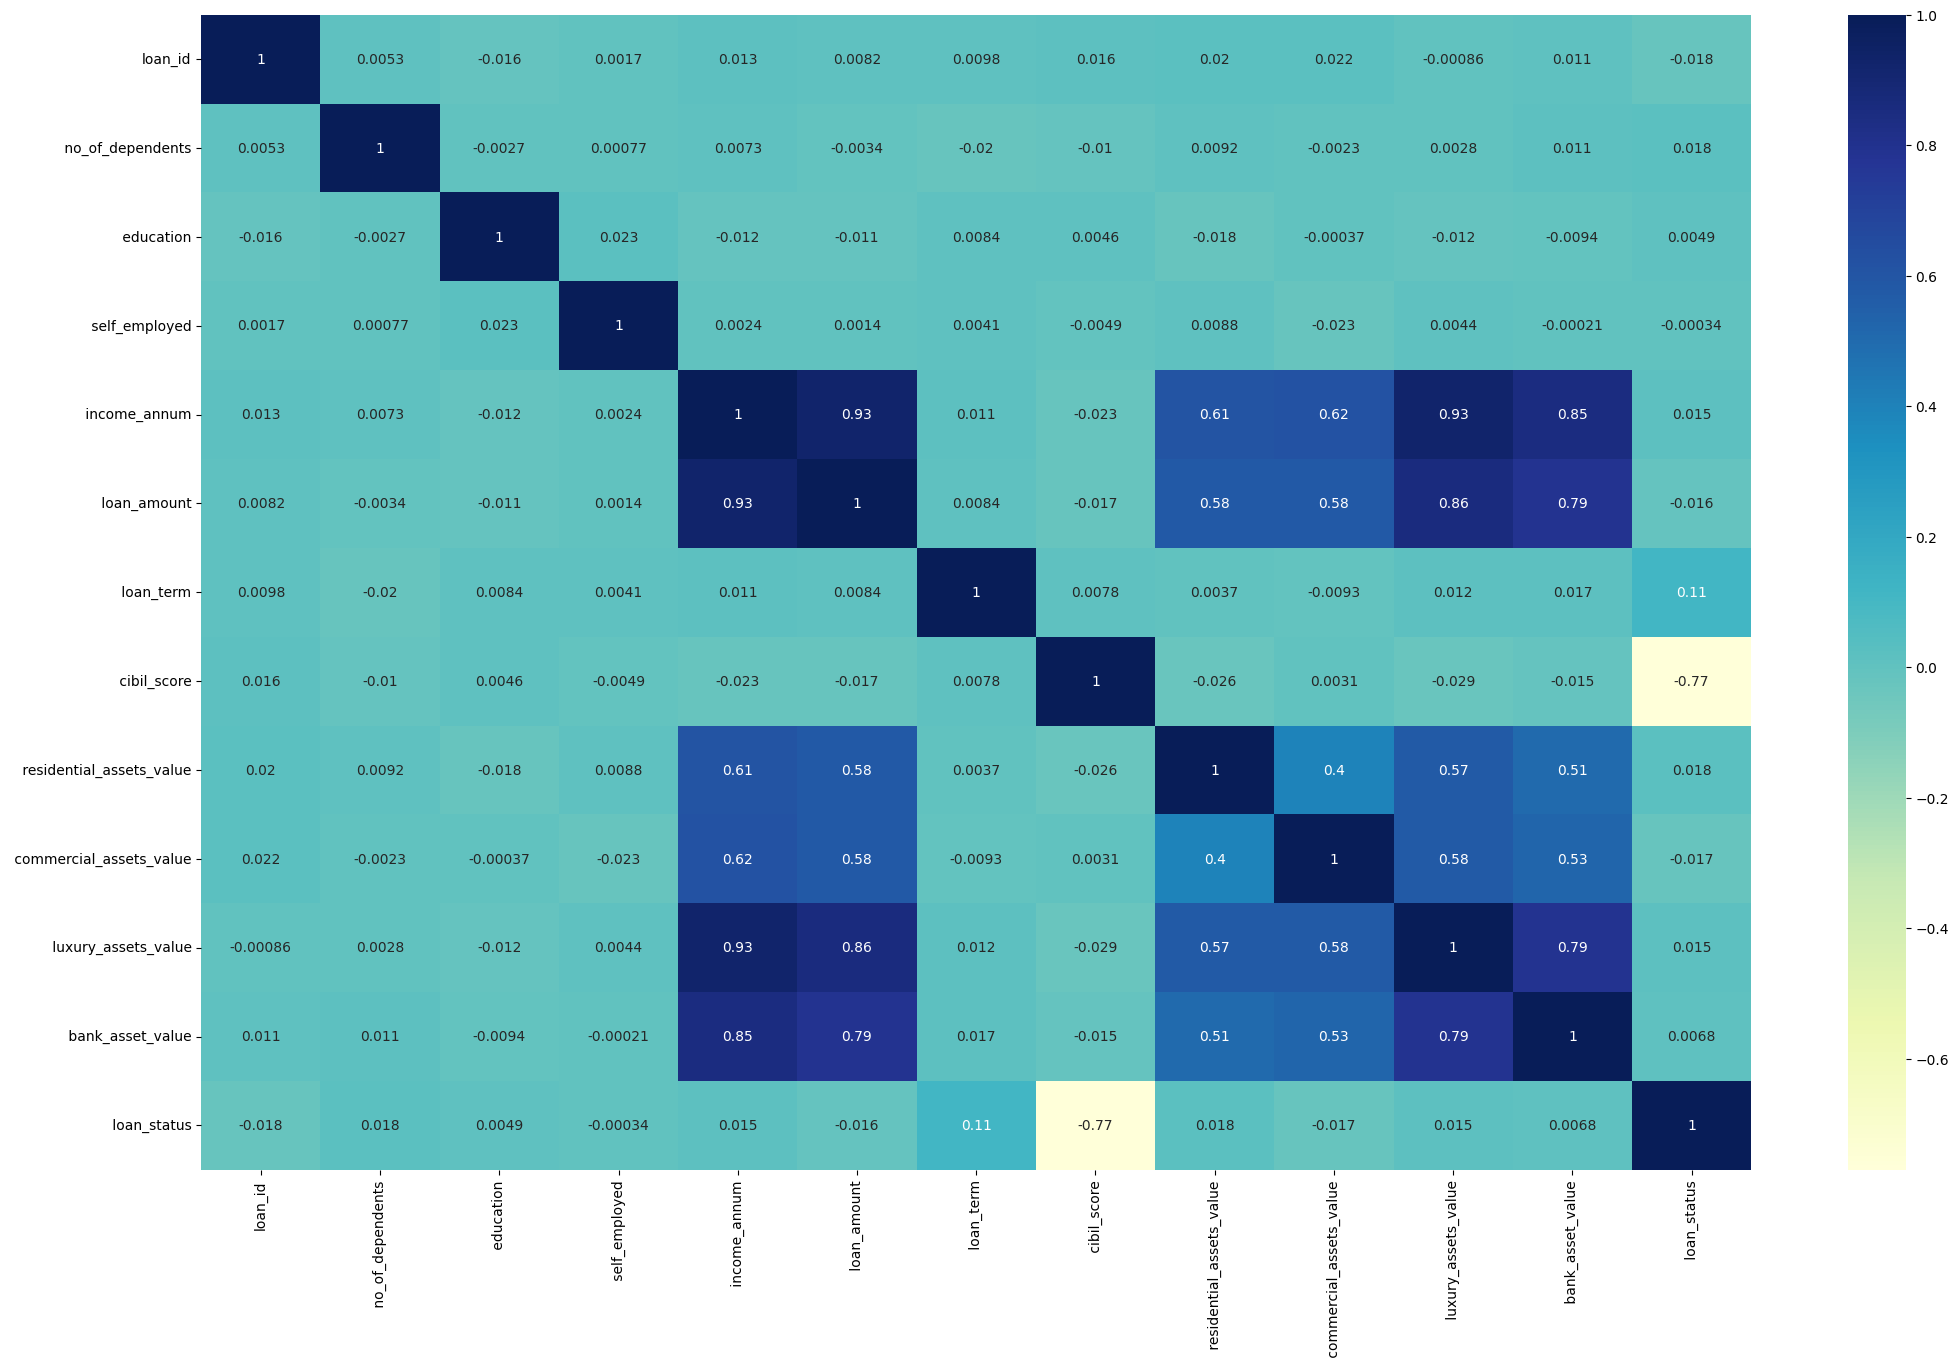

In [79]:
plt.figure(figsize=(25, 15))
sn.heatmap(data.corr(),annot=True,cmap='YlGnBu')

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [84]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


In [85]:
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"Model: {name}")
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.91      0.75       810
           1       0.44      0.13      0.20       471

    accuracy                           0.62      1281
   macro avg       0.54      0.52      0.47      1281
weighted avg       0.57      0.62      0.55      1281

Confusion Matrix:
 [[735  75]
 [412  59]]
--------------------------------------------------
Model: Random Forest
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       810
           1       0.98      0.95      0.97       471

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.97      1281
weighted avg       0.98      0.98      0.98      1281

Confusion Matrix:
 [[803   7]
 [ 23 448]]
--------------------------------------------------
Model: Decision Tree
Accuracy: 0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [86]:
# Display results
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print(results_df.sort_values(by="Accuracy", ascending=False))


                    Model  Accuracy
1           Random Forest  0.976581
2           Decision Tree  0.974239
5             Naive Bayes  0.767369
3  Support Vector Machine  0.632319
0     Logistic Regression  0.619828
4     K-Nearest Neighbors  0.580016
